In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(8,5)})
matplotlib.rc_file_defaults()

In [2]:
df = pd.read_csv("data/num_dataset_houses.csv")

In [3]:
df.head()

,ano_de_construccion,banos,disposicion,dormitorios,estado,garajes,gastos_comunes,m2_de_la_terraza,m2_del_terreno,m2_edificados,price,tipo_propiedad,vivienda_social,zona
0,1991.0,1.0,contrafrente,1.0,excelente estado,0.0,5000.0,0.0,45.0,45.0,150000.0,apartamentos,0.0,punta carretas
1,2007.0,3.0,NaN,3.0,excelente estado,1.0,0.0,0.0,155.0,125.0,329000.0,casas,0.0,pocitos nuevo
2,2012.0,3.0,al frente,4.0,excelente estado,2.0,16000.0,0.0,150.0,150.0,650000.0,apartamentos,0.0,punta carretas
3,2015.0,1.0,lateral,1.0,excelente estado,1.0,6000.0,0.0,59.0,59.0,273000.0,apartamentos,0.0,buceo
4,2019.0,1.0,NaN,1.0,buen estado,0.0,0.0,0.0,35.0,35.0,160000.0,apartamentos,0.0,pocitos


# Datos generales

In [4]:
df.shape

(11278, 14)

In [7]:
df.describe(percentiles=[.25,.5,.75,.9,.99,.999])

,ano_de_construccion,banos,dormitorios,garajes,gastos_comunes,m2_de_la_terraza,m2_del_terreno,m2_edificados,price,vivienda_social
count,11278.000000,11278.000000,11278.000000,11278.000000,11278.000000,11278.000000,11278.000000,11278.000000,1.127800e+04,11278.000000
mean,1989.217946,1.648431,2.297304,0.829402,4205.185405,7.467060,133.646524,103.360120,2.506128e+05,0.086806
std,32.882366,0.760783,1.131276,4.682504,6900.207332,25.138485,150.880281,82.818281,2.124459e+05,0.281563
min,1060.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.025000,21.000000,1.125000e+04,0.000000
25%,1965.000000,1.000000,2.000000,0.000000,0.000000,0.000000,54.000000,54.000000,1.300000e+05,0.000000
50%,1998.000000,1.000000,2.000000,0.000000,1100.000000,0.000000,76.000000,75.000000,1.790000e+05,0.000000
75%,2017.000000,2.000000,3.000000,1.000000,5000.000000,5.000000,140.000000,124.000000,2.950000e+05,0.000000
90%,2019.000000,3.000000,4.000000,2.000000,14000.000000,18.000000,300.000000,200.000000,4.900000e+05,0.000000
99%,2020.000000,3.000000,5.000000,3.000000,32000.000000,115.230000,800.000000,436.690000,1.130750e+06,1.000000
99.9%,2021.000000,3.000000,5.000000,127.000000,44723.000000,310.845000,962.000000,744.460000,1.794460e+06,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11278 entries, 0 to 11277
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano_de_construccion  11278 non-null  float64
 1   banos                11278 non-null  float64
 2   disposicion          10066 non-null  object 
 3   dormitorios          11278 non-null  float64
 4   estado               11243 non-null  object 
 5   garajes              11278 non-null  float64
 6   gastos_comunes       11278 non-null  float64
 7   m2_de_la_terraza     11278 non-null  float64
 8   m2_del_terreno       11278 non-null  float64
 9   m2_edificados        11278 non-null  float64
 10  price                11278 non-null  float64
 11  tipo_propiedad       11278 non-null  object 
 12  vivienda_social      11278 non-null  float64
 13  zona                 11232 non-null  object 
dtypes: float64(10), object(4)
memory usage: 1.2+ MB


## Con estos paso ya podemos identificar dos problemas a tratar:
    - disposicion, estado y zona poseen nulos. Debemos analizar su tratamiento.
    - Columnas categóricas: disposición, estado, tipo_propieda, banos, dormitorios, garajes, vivienda social, zona y ano_de_construccion. El resto numéricas.
    - Año de construcción tiene outlier 2108 y 1060.
    - Garajes tiene un valor de 127 que podría ser que esté vendiendo una propiedad que rente espacios de aparcamiento. Se debe analizar cuántos casos hay para decidir si descartar estos casos o cómo tratarlos.
    - Vivienda social está muy desbalanceada. Teniendo un ratio de 1:10 de 1 con respecto a 0.

# Análisis del target

### Target: price

In [10]:
df['price'].describe(percentiles=[.5,.9,.99])

count    1.127800e+04
mean     2.506128e+05
std      2.124459e+05
min      1.125000e+04
50%      1.790000e+05
90%      4.900000e+05
99%      1.130750e+06
max      3.500000e+06
Name: price, dtype: float64

 El valor mínimo está en el orden de 10^4 y el máximo en 10^6 por lo que, teniendo en cuenta los precios previamente conocidos de propiedad, son en principio un rango aceptable de valores. Hasta el cuantil 90 se tienen valores menores a 500000

<AxesSubplot:>

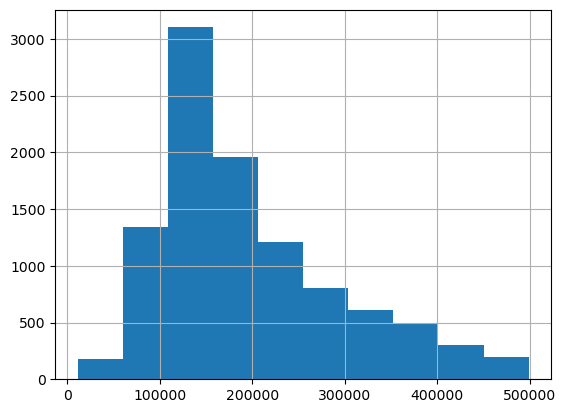

In [18]:
df[df['price'] < 500000].price.hist()

In [20]:
#skewness and kurtosis
print("Skewness: %f" % df.price.skew())
print("Curtosis: %f" % df.price.kurt())
print("Skewness: %f" % df.price.mean())

Skewness: 3.381913
Curtosis: 20.396357
Skewness: 250612.792605


Dados el histograma y las medidas estadísticas vistas en el paso anterior, vemos que hay concentración de datos cercanos a la media, que a su vez está corrida hacia los valores más bajos (eso implica la curtosis alta).
La "skewness" positiva nos indica una cola corrida hacia la derecha, típica en este tipo de distribuciones.
- Estos valores nos pueden ayudar a elegir un buen dataset de train y test, esperando que sus valores no varíen del total de la población.

## Relación entre target y variables numéricas

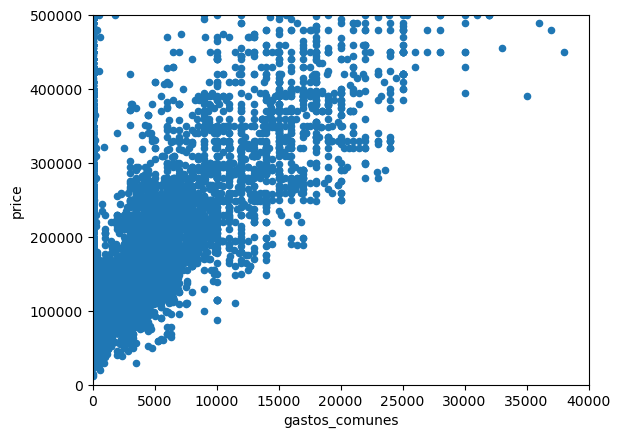

In [37]:
var = 'gastos_comunes'
data = pd.concat( [df['price'], df[var]], 
                  axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,500000), xlim=(0,40000));

Se ve una correlación lineal muy marcada, con excepciones en gastos muy bajos. Posiblemente se deba a otras variables pero a pesar de eso la correlación es muy alta.

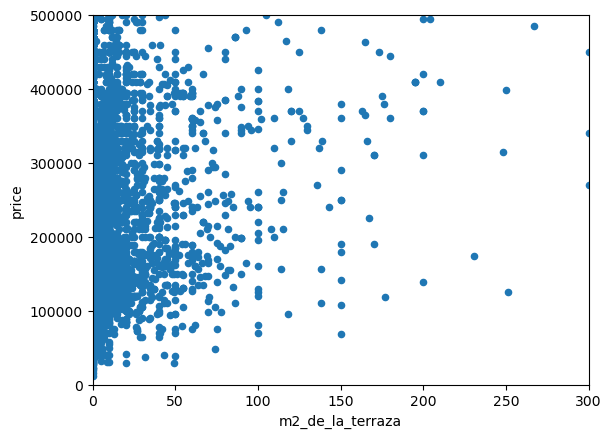

In [46]:
var = 'm2_de_la_terraza'
data = pd.concat( [df['price'], df[var]], 
                  axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,500000), xlim=(0,300));

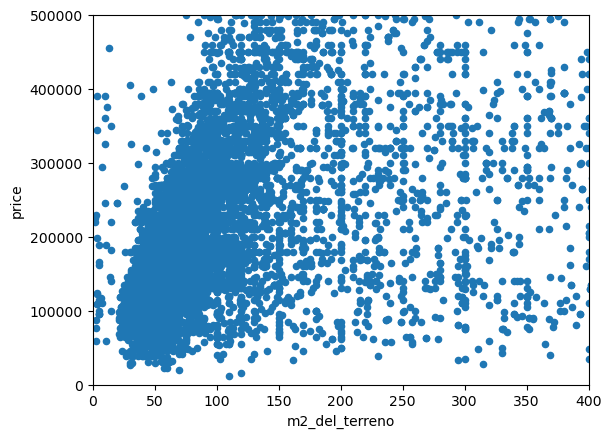

In [48]:
var = 'm2_del_terreno'
data = pd.concat( [df['price'], df[var]], 
                  axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,500000), xlim=(0,400));

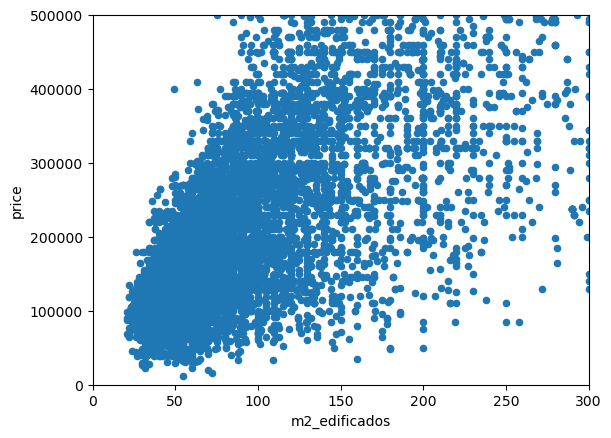

In [47]:
var = 'm2_edificados'
data = pd.concat( [df['price'], df[var]], 
                  axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,500000), xlim=(0,300));

m2_de_la_terraza no parece tener una relación lineal con el precio. Lo que podría tener mucho sentido, ya que si bien se valora, otras categorías como los gastos, metros edificados deberían tener mucho más importancia.
En principio podemos evaluar descartar esta variables.

Con metros del terreno y edificados se puede apreciar correlación aunque no tan marcada como esperaba. Pero siguen siendo variables importantes a tener en cuenta.

## Relación entre target y variables categóricas

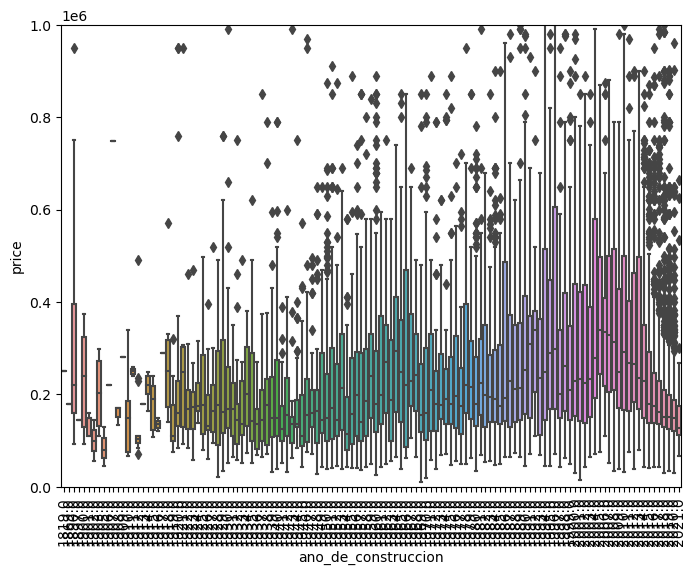

In [61]:
var = 'ano_de_construccion'
data = pd.concat([df[
                        (df['ano_de_construccion'] > 1800)
                        & (df['ano_de_construccion'] < 2023)
                    ]['price'],
                  df[
                        (df['ano_de_construccion'] > 1800)
                        & (df['ano_de_construccion'] < 2023)
                    ][var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)
None

Se puede ver cierta tendencia a que lo más nuevo tiene mayor valor (se podría deber simplemente a inflación), aunque en los últimos años parece cambiar esta tendencia. Podría deberse al contexto social. Veamos con más detalle los últimos años.

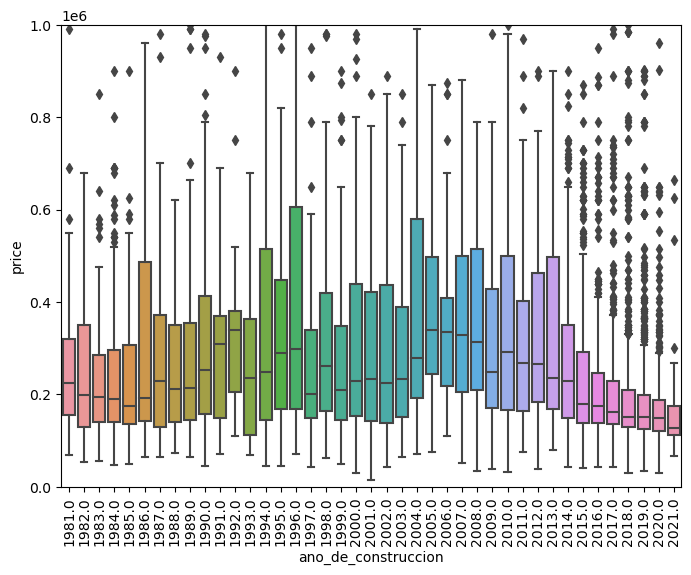

In [63]:
var = 'ano_de_construccion'
data = pd.concat([df[
                        (df['ano_de_construccion'] > 1980)
                        & (df['ano_de_construccion'] < 2023)
                    ]['price'],
                  df[
                        (df['ano_de_construccion'] > 1980)
                        & (df['ano_de_construccion'] < 2023)
                    ][var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)
None

Se ve un cambio de tendencia claro a partir de 2014 aunque también se ve más dispersión en los precios.

Se debe profundizar en el análisis multivariado para entender si alguno de los demás datos podrían afectar la relación.

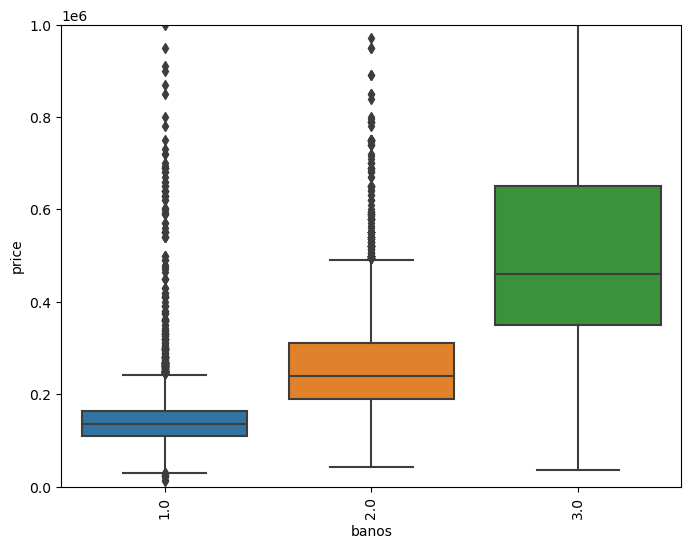

In [65]:
var = 'banos'
data = pd.concat([df['price'],
                  df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)
None

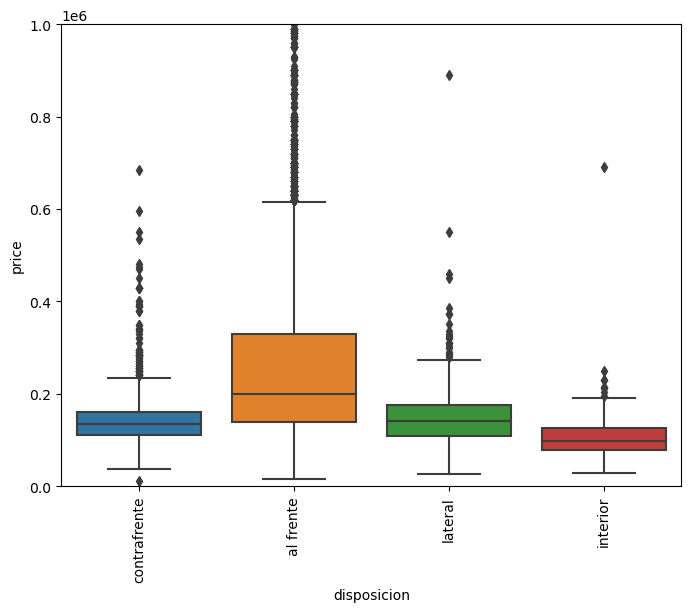

In [66]:
var = 'disposicion'
data = pd.concat([df['price'],
                  df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)
None

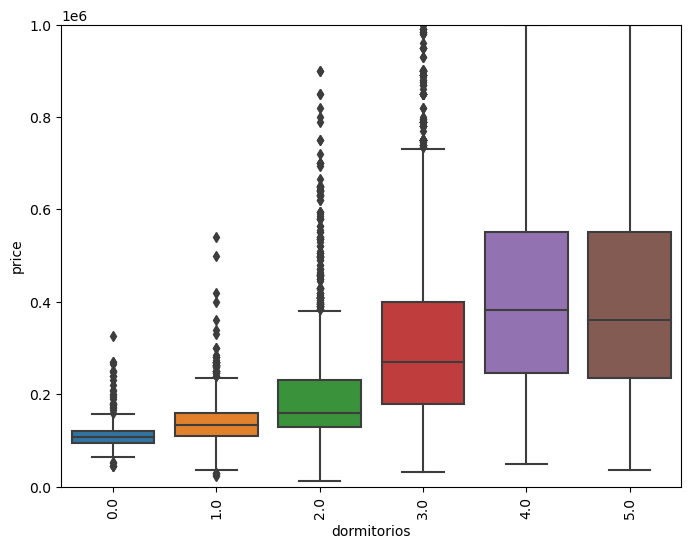

In [67]:
var = 'dormitorios'
data = pd.concat([df['price'],
                  df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)
None

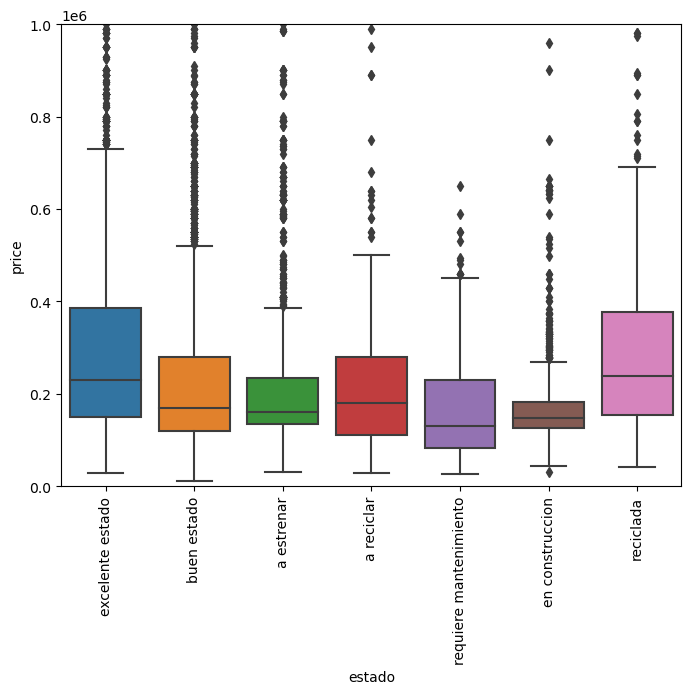

In [68]:
var = 'estado'
data = pd.concat([df['price'],
                  df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)
None

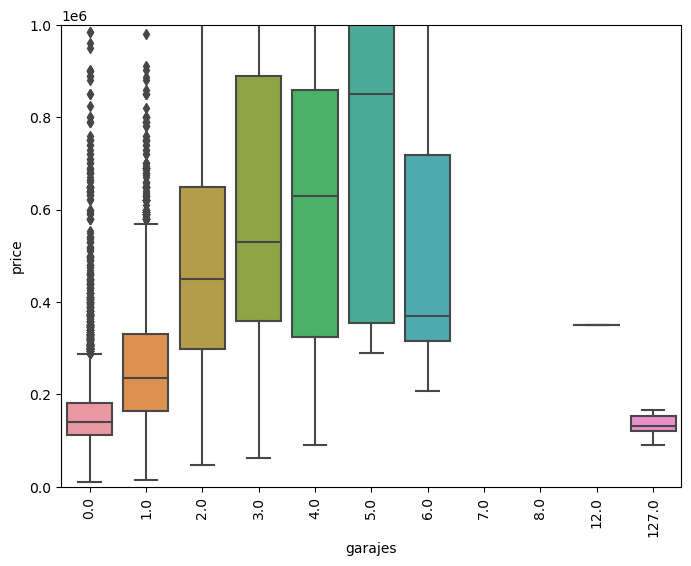

In [69]:
var = 'garajes'
data = pd.concat([df['price'],
                  df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)
None

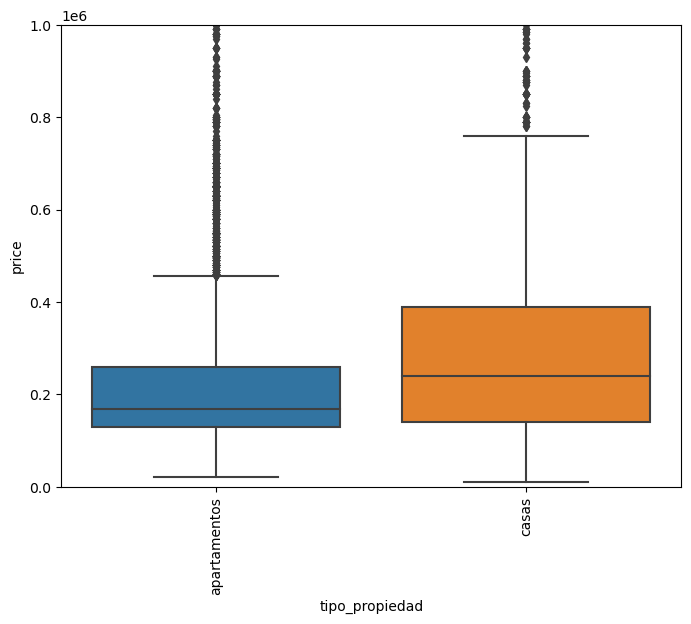

In [70]:
var = 'tipo_propiedad'
data = pd.concat([df['price'],
                  df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)
None

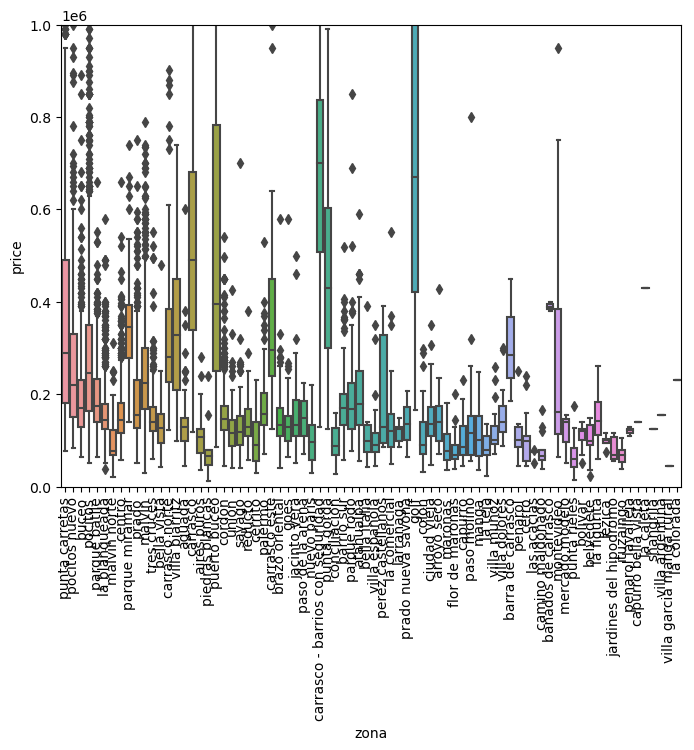

In [71]:
var = 'zona'
data = pd.concat([df['price'],
                  df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)
None

Obtengamos las zonas más caras en promedio

In [29]:
df.price.median()

179000.0

In [30]:
list(df.groupby(['zona'])['price'].median().reset_index().query('price >= 1.5*179000')['zona'])

['banados de carrasco',
 'barra de carrasco',
 'carrasco',
 'carrasco - barrios con seguridad',
 'carrasco este',
 'carrasco norte',
 'golf',
 'la caleta',
 'parque miramar',
 'puerto buceo',
 'punta carretas',
 'punta gorda',
 'villa biarritz']

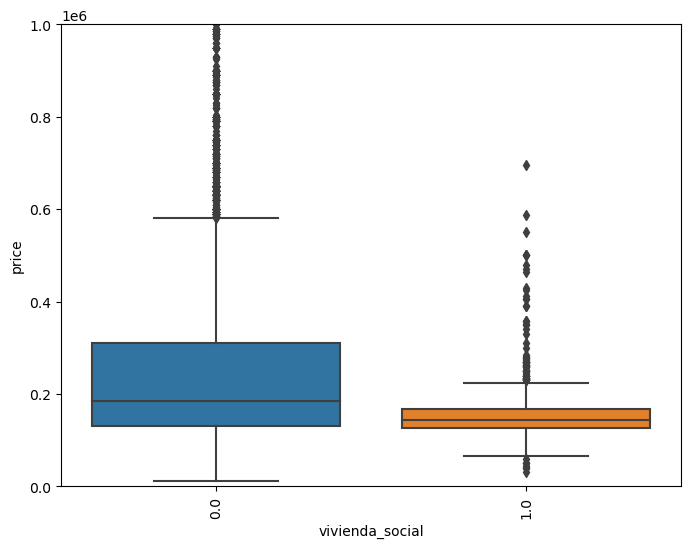

In [72]:
var = 'vivienda_social'
data = pd.concat([df['price'],
                  df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)
None

### En resumen:

- Se ven variables que están muy correlacionadas con el precio: m2 de edificados y del terreno, vivienda social, tipo de propiedad, estado, dormitorios, baños y disposición.

- El dataset no tiene muchos datos por lo que se utilizarán estrategias como k fold para el entrenamiento.

- El precio se distribuye entre valores aparentemente válidos. Se debería tener en cuenta si están actualizados según inflación pero para este análisis supondremos que sí.

- Hay muchos valores en la categoría zona y año de construcción por que se utilizarán estragecias de agrupamiento (como por ejemplo años desde que fue construido y tomarlo como numérico, definir nuevo o viejo, zonas de alto valor y bajo valor, etc.).

- Se ven algunos outliers en año de construcción que por ser pocos caso se sacarán para el entrenamiento.


# Análisis multivariado

<AxesSubplot:>

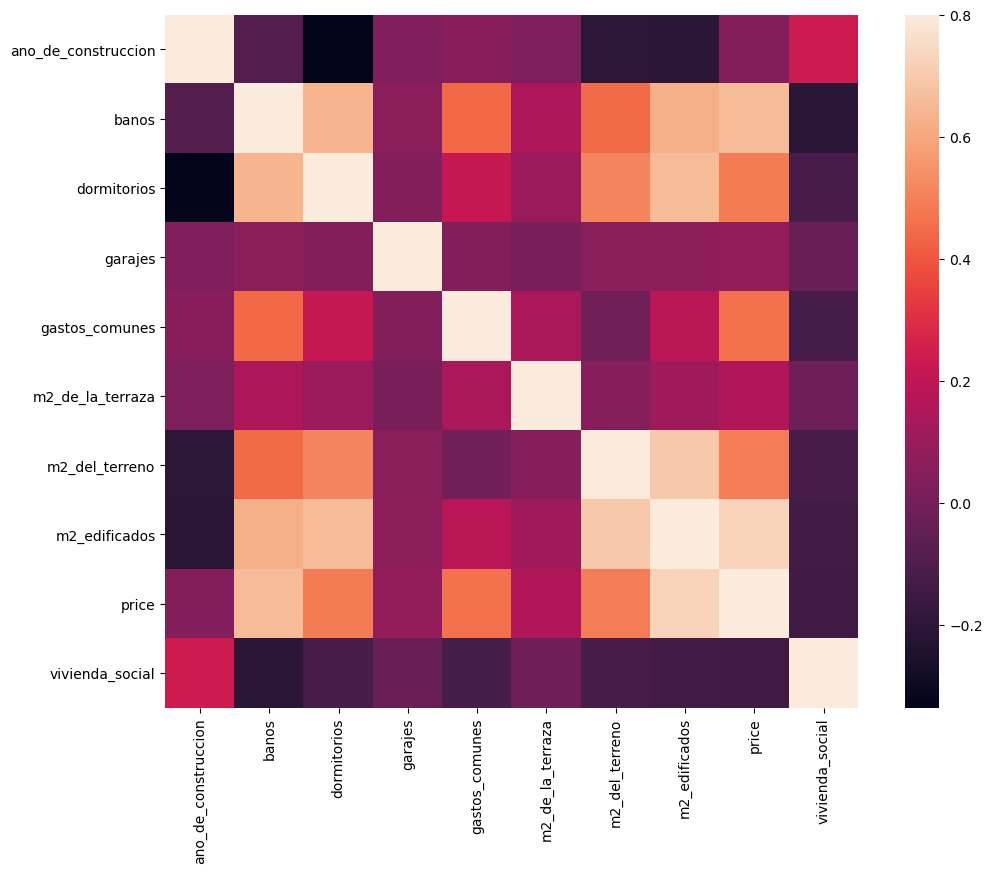

In [73]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

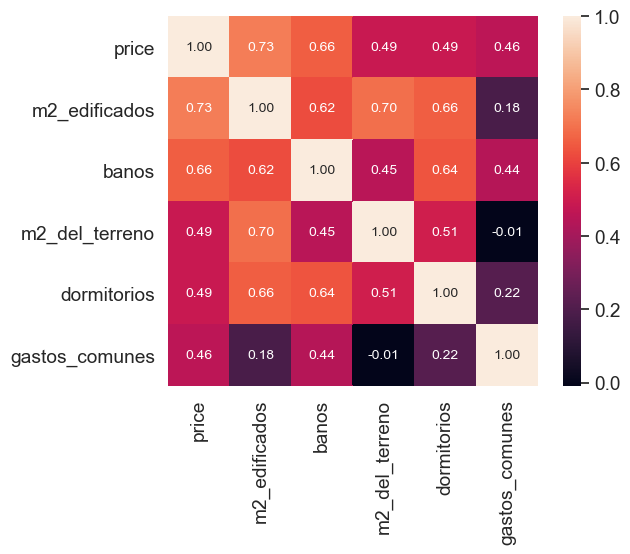

In [78]:
k = 6
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

 Podemos varias cosas que nuestra intuición podría ya haber visto:
 - Baño y dormitorios correlacionan fuertemente, pero baño correlaciona aún más con el precio. Por lo que tomaremos la variable baño.
 - Metros edificados y del terreno también correlacionan mucho, por lo que tomaremos los edificados.
 - Las variables que más correlacionan con el precio (al menos linealmente) son los metros edificados, baños y gastos comunes.
 
 Por otro lado hay muy poca correlación entre el año de la construcción y el precio. De hecho también poca correlación contra el resto de variables. Se podría realizar un análisis de series de tiempo para profundizar pero para este desafío simplemente vamos a dejar a un lado esta variable.

En principio podríamos tomar (para una regresión lineal) las variables: m2_edificados, banos, gastos_comunes y vivienda_social. Más las categóricas en string: disposición, tipo_propiedad, estado, zona.

# Tratamiento de nulos

In [85]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() * 100 /df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
disposicion,1212,10.746586
zona,46,0.407874
estado,35,0.310339
ano_de_construccion,0,0.000000
banos,0,0.000000


Para zona y estado podrían tanto borrarse las observaciones por representar en conjunto menos del 1% de las observaciones como así también generar una categoría "desconocido" para estos casos.
La variable disposición tiene más del 10% en nulos. Por lo que eliminar las observaciones nos haría perder muchísima información. Dado que las demás variables están podríamos tratar de predecir la disposición para estas observaciones pero podríamos estar sesgando el análisis dado el tamaño del dataset. Por lo que vamos a optar por crear un flag de is_missing además una categoría "desconocido".

# Outliers

En principio tenemos outliers en año de construcción pero como no tomaremos esta variable por no tener tanto peso como las mencionadas anteriormente no hace falta ninguna acción.

Similar con el caso de garajes.

# Conclusión

- Variables a utilizar: m2_edificados, banos, gastos_comunes, vivienda_social, disposicion, tipo_propiedad, estado, zona
- Para disposición, por tener nulos, crearemos una categoría "desconocido" y un flag que indique si viene el valor. El agregado de una nueva categoría no debería afectar tanto en el rendimiento dada la baja cardinalidad de la variable.
- Se eliminarán las observaciones con nulos en estado o zona.
- Zona es una categórica de alta cardinalidad por lo que repensaremos esta variable para reducir sus posibilidades. Fácilmente podemos ver que la distribución de precios depende de la zona por lo que podríamos pensar en zonas alta y bajas según su distribución de precios. Por lo tanto tomaremos como zonas altas aquellas cuya mediana está por encima de 1.5 veces la mediana de toda la población. Si tuviéramos otras variables con respecto a la zona harían menos sensible a cambios futuros (tasa criminalidad, distancia a accesos principales, ultimos precios de casas similares en la zona, etc).
- Estado es una categórica que tiene cardinalidad media, con 7 posibilidades. OHE sobre esta variable podría generar una matriz un poco sparse pero en esta primera iteración la sumiremos de esa manera.
- Codificación ordinal para banos.
- OHE para vivienda_social, disposicion, tipo_propiedad, estado y zona (estas dos últimas con el previo trabajo de reagrupar). Estas variables hay que validar que los sus valores sean alguno de los usados para el entrenamiento. Ya que el modelo perdería precisión con otros valores. En caso de disposición no hace falta porque estamos usando la categoría 'desconocido' en el entrenamiento con lo que el modelo tiene observaciones para cuando no viene el valor.